# More Data, More Maps!

Now that we know how to pull in data, check and transform Coordinate Reference Systems (CRS), and plot GeoDataFrames together, let's practice doing the same thing with other geometry types. In this notebook we'll be bringing in maps of bike boulevards and schools, which will prime us to think about spatial relationship questions.


<!---
- Expected time to complete
    - Lecture + Questions: 30 minutes
    - Exercises: 20 minutes
-->

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  

## Berkeley Bike Boulevards

We're going to bring in data bike boulevards in Berkeley. Note two things that are different from our previous data:

- We're importing a [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) this time, and not a shapefile.
- We have a **line** geometry GeoDataFrame, while our county and states data had **polygon** geometries.

<Axes: >

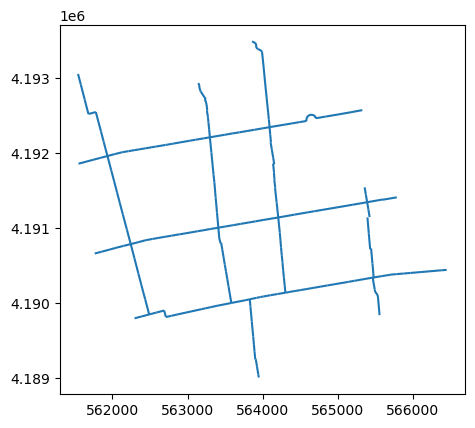

In [2]:
bike_blvds = gpd.read_file('../data/transportation/BerkeleyBikeBlvds.geojson')
bike_blvds.plot()

As usual, we'll want to do our typical data exploration...

In [3]:
bike_blvds.head()

,BB_STRNAM,BB_STRID,BB_FRO,BB_TO,BB_SECID,DIR_,Status,ALT_bikeCA,Shape_len,len_km,geometry
0,Heinz/Russell,RUS,7th,8th,RUS01,E/W,Existing,No,101.128166,0.101,"MULTILINESTRING ((562293.786 4189795.092, 5623..."
1,Heinz/Russell,RUS,8th,9th,RUS02,E/W,Ezisting,No,100.814072,0.101,"MULTILINESTRING ((562391.553 4189820.949, 5624..."
2,Heinz/Russell,RUS,9th,10th,RUS03,E/W,Existing,No,100.037396,0.100,"MULTILINESTRING ((562489.017 4189846.721, 5625..."
3,Heinz/Russell,RUS,10th,San Pablo,RUS04,E/W,Existing,No,106.592878,0.107,"MULTILINESTRING ((562585.723 4189872.321, 5626..."
4,San Pablo,RUS,Heinz,Russell,RUS05,N/S,Existing,No,89.563478,0.090,"MULTILINESTRING ((562688.854 4189899.267, 5627..."


In [4]:
bike_blvds.shape

(211, 11)

In [5]:
bike_blvds.columns

Index(['BB_STRNAM', 'BB_STRID', 'BB_FRO', 'BB_TO', 'BB_SECID', 'DIR_',
       'Status', 'ALT_bikeCA', 'Shape_len', 'len_km', 'geometry'],
      dtype='object')

Our bike boulevard data includes the following information:

- `BB_STRNAM`: Bike boulevard street name
- `BB_STRID`: Bike boulevard street ID
- `BB_FRO`: Bike boulevard origin street
- `BB_TO`: Bike boulevard end street
- `BB_SECID`: Bike boulevard section id
- `DIR_`: Cardinal directions the bike boulevard runs
- `Status`: Status on whether the bike boulevard exists
- `ALT_bikeCA`: Unclear what this column indicates
- `Shape_len`: Length of the boulevard in meters 
- `len_km`: Length of the boulevard in kilometers
- `geometry`: Our standard geometry column for GeoDataFrames

Let's go ahead and check out the CRS that comes with the GeoDataFrame:

In [6]:
bike_blvds.crs

<Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let's tranform our CRS to NAD83 / UTM Zone 10N that we used in the last lesson.

In [7]:
bike_blvds_utm10 = bike_blvds.to_crs("epsg:26910")

In [8]:
bike_blvds_utm10.head()

,BB_STRNAM,BB_STRID,BB_FRO,BB_TO,BB_SECID,DIR_,Status,ALT_bikeCA,Shape_len,len_km,geometry
0,Heinz/Russell,RUS,7th,8th,RUS01,E/W,Existing,No,101.128166,0.101,"MULTILINESTRING ((562293.786 4189795.091, 5623..."
1,Heinz/Russell,RUS,8th,9th,RUS02,E/W,Ezisting,No,100.814072,0.101,"MULTILINESTRING ((562391.553 4189820.949, 5624..."
2,Heinz/Russell,RUS,9th,10th,RUS03,E/W,Existing,No,100.037396,0.100,"MULTILINESTRING ((562489.017 4189846.721, 5625..."
3,Heinz/Russell,RUS,10th,San Pablo,RUS04,E/W,Existing,No,106.592878,0.107,"MULTILINESTRING ((562585.723 4189872.321, 5626..."
4,San Pablo,RUS,Heinz,Russell,RUS05,N/S,Existing,No,89.563478,0.090,"MULTILINESTRING ((562688.854 4189899.266, 5627..."


In [9]:
bike_blvds_utm10.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 126°W and 120°W - onshore and offshore. Canada - British Columbia; Northwest Territories; Yukon. United States (USA) - California; Oregon; Washington.
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

---

### Challenge 1: 

The GeoDataFrame has 211 samples, indicating 211 lines. However, when we plot the GeoDataFrame, we only see 8 bike boulevards. How do we explain the discrepancy?

You may find it helpful to look closely at the GeoDataFrame, or even plot subsets of it. You could even plot the entire GeoDataFrame, and then plot a subset of it on top of the original plot, but with a different color.

---

In [10]:
# Look at top 50
bike_blvds_utm10.head(50)


,BB_STRNAM,BB_STRID,BB_FRO,BB_TO,BB_SECID,DIR_,Status,ALT_bikeCA,Shape_len,len_km,geometry
0,Heinz/Russell,RUS,7th,8th,RUS01,E/W,Existing,No,101.128166,0.101,"MULTILINESTRING ((562293.786 4189795.091, 5623..."
1,Heinz/Russell,RUS,8th,9th,RUS02,E/W,Ezisting,No,100.814072,0.101,"MULTILINESTRING ((562391.553 4189820.949, 5624..."
2,Heinz/Russell,RUS,9th,10th,RUS03,E/W,Existing,No,100.037396,0.100,"MULTILINESTRING ((562489.017 4189846.721, 5625..."
3,Heinz/Russell,RUS,10th,San Pablo,RUS04,E/W,Existing,No,106.592878,0.107,"MULTILINESTRING ((562585.723 4189872.321, 5626..."
4,San Pablo,RUS,Heinz,Russell,RUS05,N/S,Existing,No,89.563478,0.090,"MULTILINESTRING ((562688.854 4189899.266, 5627..."
5,Russell,RUS,San Pablo,Wallace,RUS06,E/W,Exisitng,3,76.956992,0.077,"MULTILINESTRING ((562711.384 4189812.583, 5627..."
6,Russell,RUS,Wallace,Mathews,RUS07,E/W,Existing,3,77.420897,0.077,"MULTILINESTRING ((562786.537 4189829.147, 5628..."
7,Russell,RUS,Mathews,Mabel,RUS08,E/W,Existing,3,120.417175,0.120,"MULTILINESTRING ((562862.146 4189845.801, 5629..."
8,Russell,RUS,Mabel,Park,RUS09,E/W,Existing,3,80.990799,0.081,"MULTILINESTRING ((562979.721 4189871.807, 5630..."
9,Russell,RUS,Park,Acton,RUS10,E/W,Existing,3,133.552965,0.134,"MULTILINESTRING ((563058.814 4189889.239, 5631..."


<Axes: >

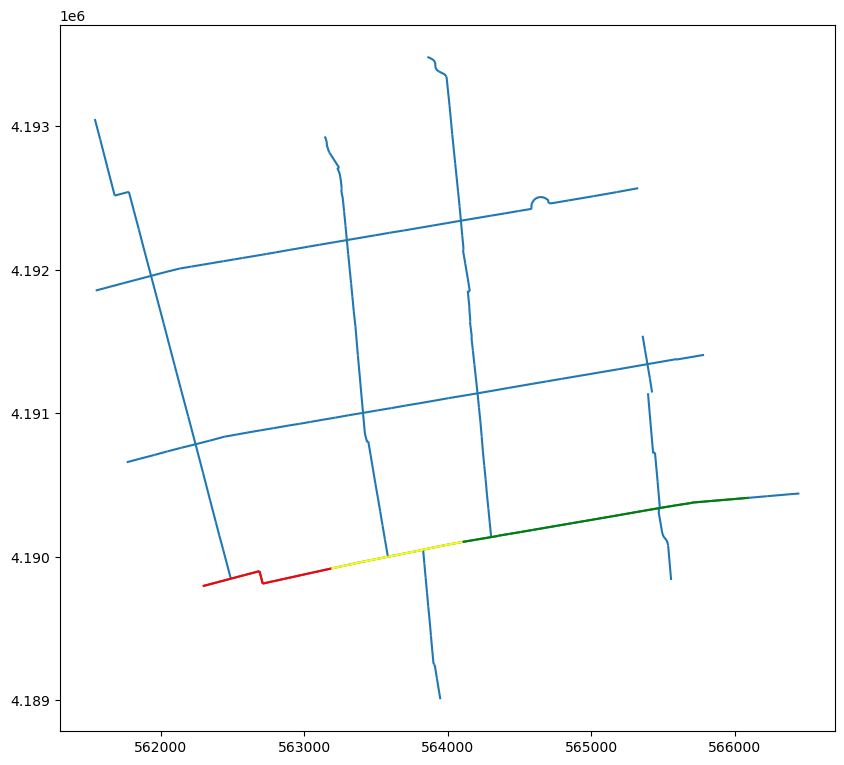

In [23]:
# Plot individual street names separately, with different colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bike_blvds_utm10.plot(ax=ax)
bike_blvds_utm10.iloc[:10].plot(color='red', ax=ax)
bike_blvds_utm10.iloc[10:20].plot(color='yellow', ax=ax)
bike_blvds_utm10.iloc[20:40].plot(color='green', ax=ax)

# Bike blvds are composed of multiple lines   

## Alameda County Schools

Alright! Now that we have our bike boulevard data squared away, we're going to bring in our Alameda County school data.

In [24]:
schools_df = pd.read_csv('../data/alco_schools.csv')
schools_df.head()

,X,Y,Site,Address,City,State,Type,API,Org
0,-122.238761,37.744764,Amelia Earhart Elementary,400 Packet Landing Rd,Alameda,CA,ES,933,Public
1,-122.251856,37.738999,Bay Farm Elementary,200 Aughinbaugh Way,Alameda,CA,ES,932,Public
2,-122.258915,37.762058,Donald D. Lum Elementary,1801 Sandcreek Way,Alameda,CA,ES,853,Public
3,-122.234841,37.765250,Edison Elementary,2700 Buena Vista Ave,Alameda,CA,ES,927,Public
4,-122.238078,37.753964,Frank Otis Elementary,3010 Fillmore St,Alameda,CA,ES,894,Public


In [25]:
schools_df.shape

(550, 9)

Wait, does this look right? Always be sure to check the data that you import. Is it what you expect?

This is not a GeoDataFrame! A couple of clues to figure that out are..

1. We're pulling in a Comma Separated Value (CSV) file, which is not a geospatial data format.
2. There is no geometry column (although we do have latitude and longitude values)

Although our school data is not starting off as a GeoDataFrame, we actually have the tools and information to make it one. Using the `gpd.GeoDataFrame` constructor, we can transform our plain DataFrame into a GeoDataFrame (specifying the geometry information and then the CRS).

In [26]:
schools_gdf = gpd.GeoDataFrame(data=schools_df, 
                               geometry=gpd.points_from_xy(schools_df.X, schools_df.Y))

In [27]:
schools_gdf.head()

,X,Y,Site,Address,City,State,Type,API,Org,geometry
0,-122.238761,37.744764,Amelia Earhart Elementary,400 Packet Landing Rd,Alameda,CA,ES,933,Public,POINT (-122.23876 37.74476)
1,-122.251856,37.738999,Bay Farm Elementary,200 Aughinbaugh Way,Alameda,CA,ES,932,Public,POINT (-122.25186 37.73900)
2,-122.258915,37.762058,Donald D. Lum Elementary,1801 Sandcreek Way,Alameda,CA,ES,853,Public,POINT (-122.25892 37.76206)
3,-122.234841,37.765250,Edison Elementary,2700 Buena Vista Ave,Alameda,CA,ES,927,Public,POINT (-122.23484 37.76525)
4,-122.238078,37.753964,Frank Otis Elementary,3010 Fillmore St,Alameda,CA,ES,894,Public,POINT (-122.23808 37.75396)


In [28]:
print(schools_gdf.crs)

None


In [29]:
# Assign a CRS
schools_gdf.crs = "epsg:4326"
schools_gdf.head()

,X,Y,Site,Address,City,State,Type,API,Org,geometry
0,-122.238761,37.744764,Amelia Earhart Elementary,400 Packet Landing Rd,Alameda,CA,ES,933,Public,POINT (-122.23876 37.74476)
1,-122.251856,37.738999,Bay Farm Elementary,200 Aughinbaugh Way,Alameda,CA,ES,932,Public,POINT (-122.25186 37.73900)
2,-122.258915,37.762058,Donald D. Lum Elementary,1801 Sandcreek Way,Alameda,CA,ES,853,Public,POINT (-122.25892 37.76206)
3,-122.234841,37.765250,Edison Elementary,2700 Buena Vista Ave,Alameda,CA,ES,927,Public,POINT (-122.23484 37.76525)
4,-122.238078,37.753964,Frank Otis Elementary,3010 Fillmore St,Alameda,CA,ES,894,Public,POINT (-122.23808 37.75396)


You'll notice that the shape is the same from what we had as a dataframe, just with the added `geometry` column.

In [30]:
schools_gdf.shape

(550, 10)

And with it being a GeoDataFrame, we can plot it as we did for our other data sets.
Notice that we have our first **point** geometry GeoDataFrame.

<Axes: >

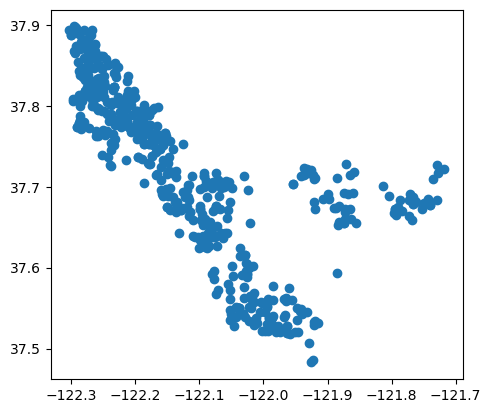

In [31]:
schools_gdf.plot()

We'll want to transform the CRS, so that we can later plot it with our bike boulevard data:

<Axes: >

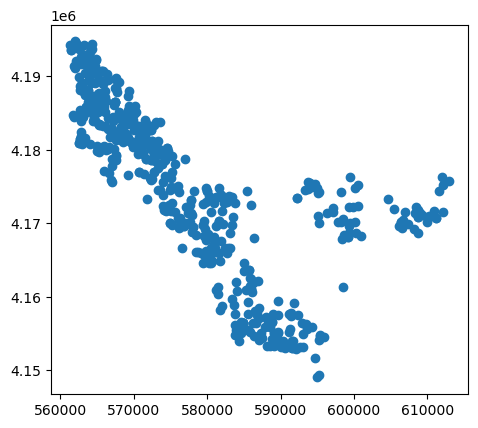

In [32]:
schools_gdf_utm10 = schools_gdf.to_crs("epsg:26910")
schools_gdf_utm10.plot()

In Lesson 2, we discussed that you can save out GeoDataFrames in multiple file formats. You could opt for a GeoJSON, a shapefile, etc. For point data sets, we have the additional option to save it out as a CSV since the geometry isn't complicated.

---

### Challenge 2: Even More Data!

Let's play around with another GeoDataFrame with point geometry.

In the code cell provided below, compose code to:

1. Read in the parcel points data (`../data/parcels/parcel_pts_rand30pct.geojson`).
2. Transform the CRS to EPSG:26910.
3. Plot and customize as desired!

---

In [33]:
# YOUR CODE HERE
# 1. Read in the parcel points data (../data/parcels/parcel_pts_rand30pct.geojson)
parcel_pts_gdf = gpd.read_file('../data/parcels/parcel_pts_rand30pct.geojson')
parcel_pts_gdf.head()

,APN,APN2,STATE,COUNTY,FIPS,SIT_HSE_NU,SIT_DIR,SIT_STR_NA,SIT_STR_SF,SIT_FULL_S,SIT_CITY,SIT_STATE,SIT_ZIP,SIT_ZIP4,LAND_VALUE,IMPR_VALUE,TOT_VALUE,totvalue2,geometry
0,1-111-1,001 011100100,CA,Alameda,06001,229,NaN,Brush,St,229 BRUSH ST,Oakland,CA,94607,3009,22057,38064,60121,60121,POINT (-122.28340 37.79949)
1,1-113-2-2,001 011300202,CA,Alameda,06001,400,NaN,Market,St,400 MARKET ST,Oakland,CA,94607,3034,375012,349588,724600,724600,POINT (-122.28308 37.80071)
2,1-115-20,001 011502000,CA,Alameda,06001,724,NaN,4th,St,724 4TH ST,Oakland,CA,94607,3018,20825,9193,30018,30018,POINT (-122.28185 37.80021)
3,1-115-26,001 011502600,CA,Alameda,06001,410,NaN,Brush,St,410 BRUSH ST,Oakland,CA,94607,3014,10484,0,10484,10484,POINT (-122.28225 37.80034)
4,1-115-28,001 011502800,CA,Alameda,06001,725,NaN,4th,St,725 4TH ST,Oakland,CA,94607,3017,38865,298480,337345,337345,POINT (-122.28227 37.79983)


In [34]:
# YOUR CODE HERE
# Examine current CRS
parcel_pts_gdf.crs

# ESPG = 4269

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [35]:
# YOUR CODE HERE
# 2. Transform the CRS to EPSG:26910.
parcel_pts_gdf_utm10 = parcel_pts_gdf.to_crs("epsg:26910")

<Axes: >

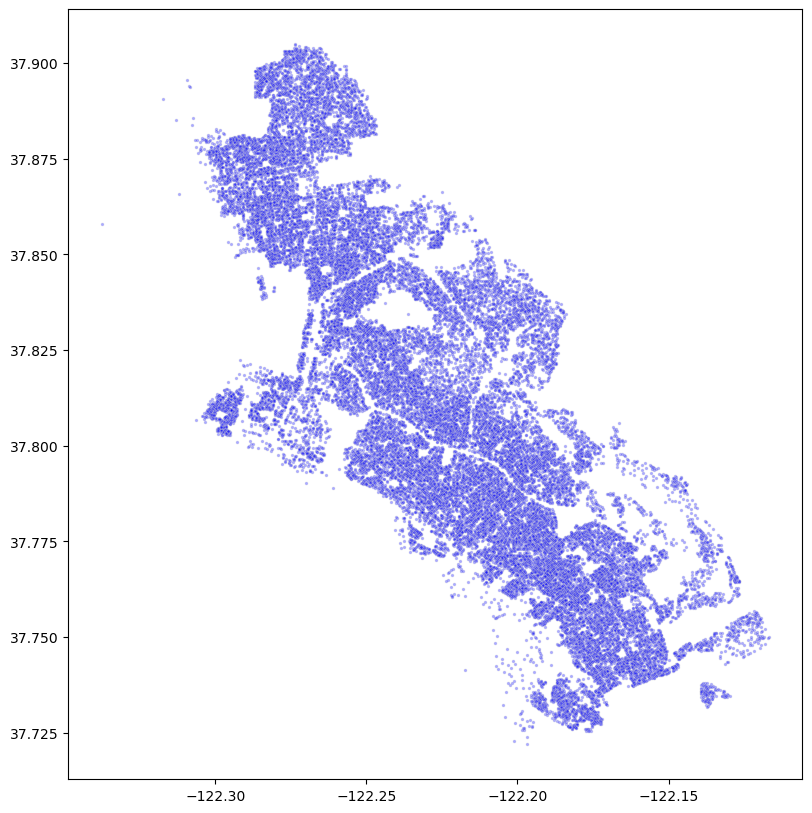

In [49]:
# YOUR CODE HERE
# 3. Plot and customize as desired!
parcel_pts_gdf.plot(markersize=5,
                    color='blue',
                    edgecolor='lightgrey',
                    linewidth=0.5,
                    alpha=0.33,
                    figsize=(10, 10))

<Axes: >

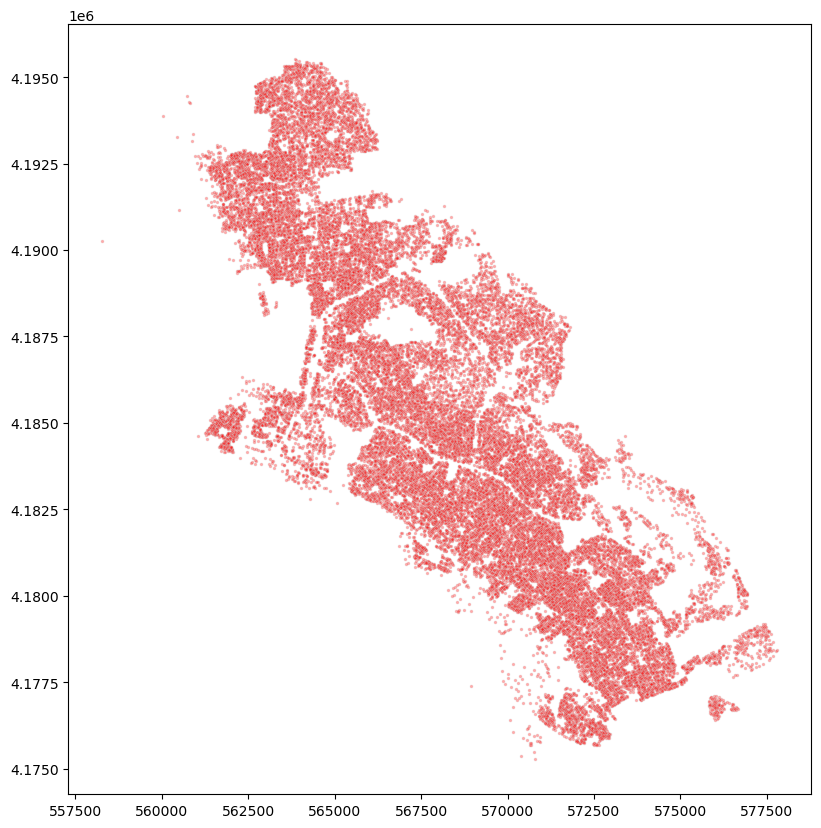

In [50]:
# YOUR CODE HERE
# 3. Plot and customize as desired!
parcel_pts_gdf_utm10.plot(markersize=5,
                          color='red',
                          edgecolor='lightgrey',
                          linewidth=0.5,
                          alpha=0.33,
                          figsize=(10, 10))

## Map Overlays with Matplotlib

No matter what geometry type we have for our GeoDataFrame, we can create overlay plots.

Since we've already done the legwork of transforming our CRS, we can go ahead and plot them together.

<Axes: >

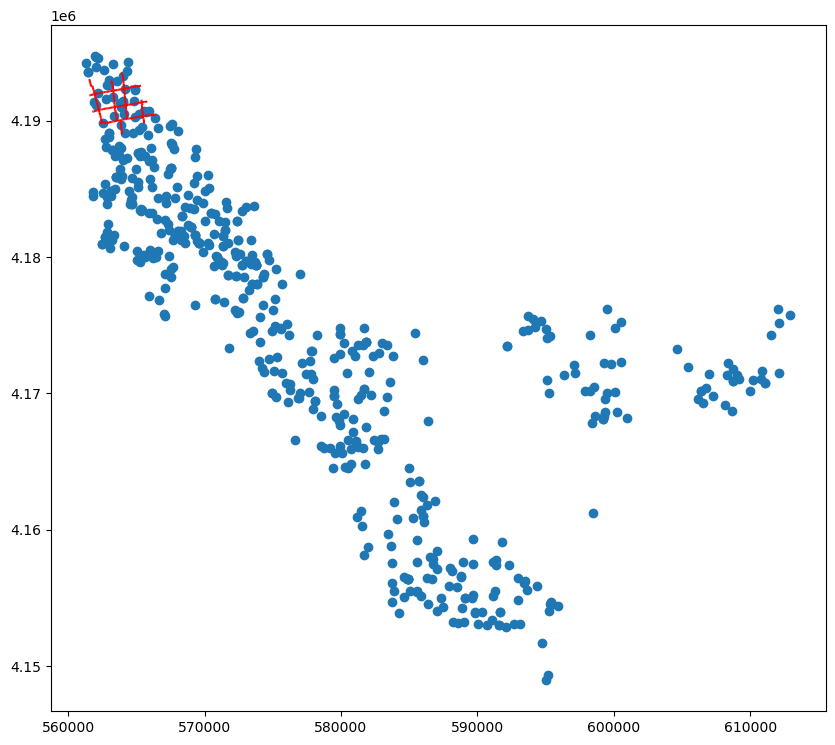

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
bike_blvds_utm10.plot(ax=ax, color='red')
schools_gdf_utm10.plot(ax=ax)

If we want to answer questions like *"What schools are close to bike boulevards in Berkeley?"*, the above plot isn't super helpful, since the extent covers all of Alameda county.

Luckily, GeoDataFrames have an easy method to extract the minimium and maximum values for both x and y, so we can use that information to set the bounds for our plot.

In [52]:
x_min, y_min, x_max, y_max = bike_blvds.total_bounds
print(x_min, y_min, x_max, y_max)

561541.1531499997 4189007.11635 566451.5549499998 4193483.09445


Using `set_xlim()` and `set_ylim()`, we can zoom in to see if there are schools proximal to the bike boulevards.

(4189007.11635, 4193483.09445)

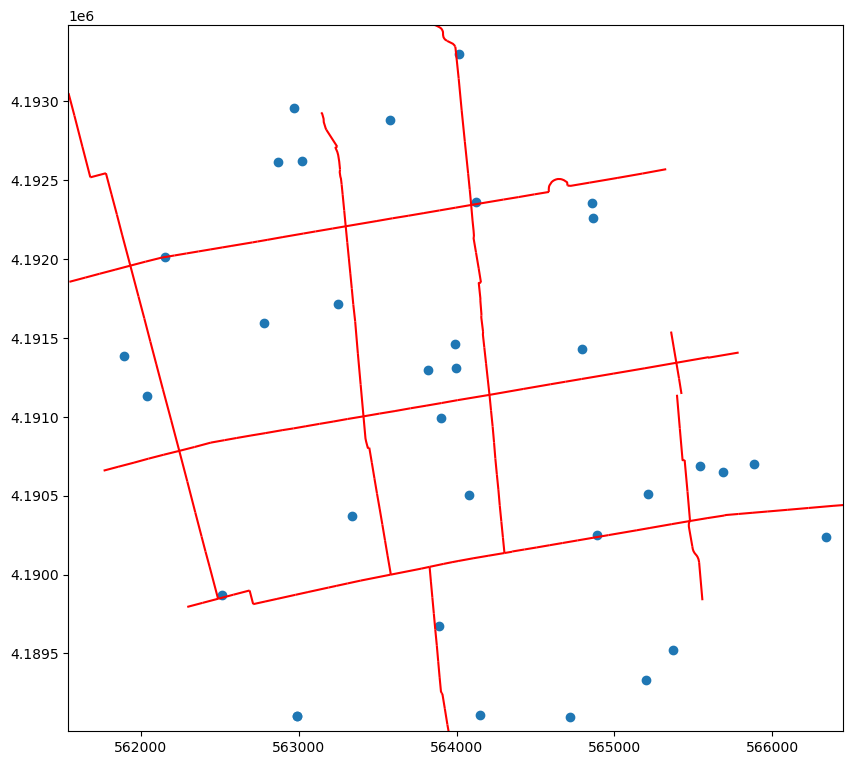

In [53]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 10))
# Plot geometries
bike_blvds_utm10.plot(ax=ax, color='red')
schools_gdf_utm10.plot(ax=ax)
# Set bounds
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

## Overview

In this lesson, we learned a several new skills:
- We Transformed an a-spatial dataframe into a geospatial one.
    - `gpd.GeoDataFrame`
- We worked with point and line GeoDataFrames.
- We overlayed point and line GeoDataFrames.
- We limited the extent of a map.
    - `total_bounds`

---

### Challenge 3: Overlay Mapping

Let's take some time to practice reading in and reconciling new datasets, then mapping them together.

In the code cell provided below, write code to:

1. Import your Berkeley places shapefile (and don't forget to check/transform the crs!) (`../data/berkeley/BerkeleyCityLimits.shp`).
2. Overlay the parcel points on top of the bike boulevards.
3. Create the same plot but limit it to the extent of Berkeley city limits.

***BONUS***: Add the Berkeley outline to your last plot!

---

In [58]:
# YOUR CODE HERE
# 1. Import Berkeley places shapefile
berkeley_places = gpd.read_file("../lessons/shapefile/berkeley_places.shp")

In [59]:
print(berkeley_places.crs)
berkeley_places_utm10 = berkeley_places.to_crs("epsg:26910")
print(berkeley_places_utm10.crs)

EPSG:4269
epsg:26910


<Axes: >

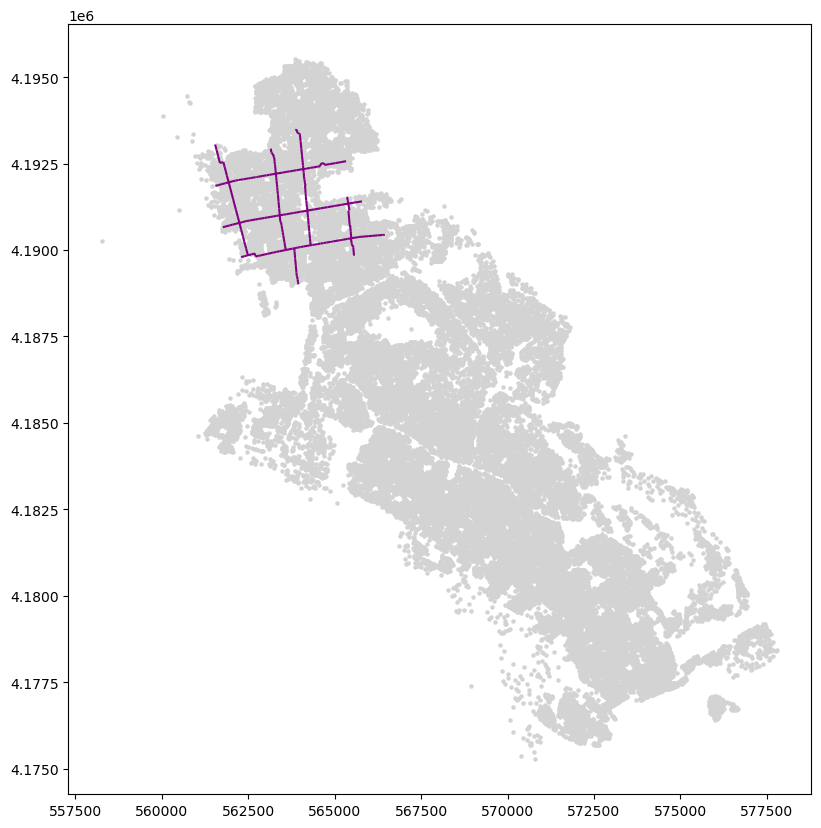

In [63]:
# YOUR CODE HERE
# 2. Overlay the parcel points on top of the bike boulevards
fig, ax = plt.subplots(figsize=(10, 10))
bike_blvds_utm10.plot(ax=ax, color='purple')
parcel_pts_gdf_utm10.plot(ax=ax, color='lightgrey', markersize=5)

(4188960.932425667, 4195616.510453224)

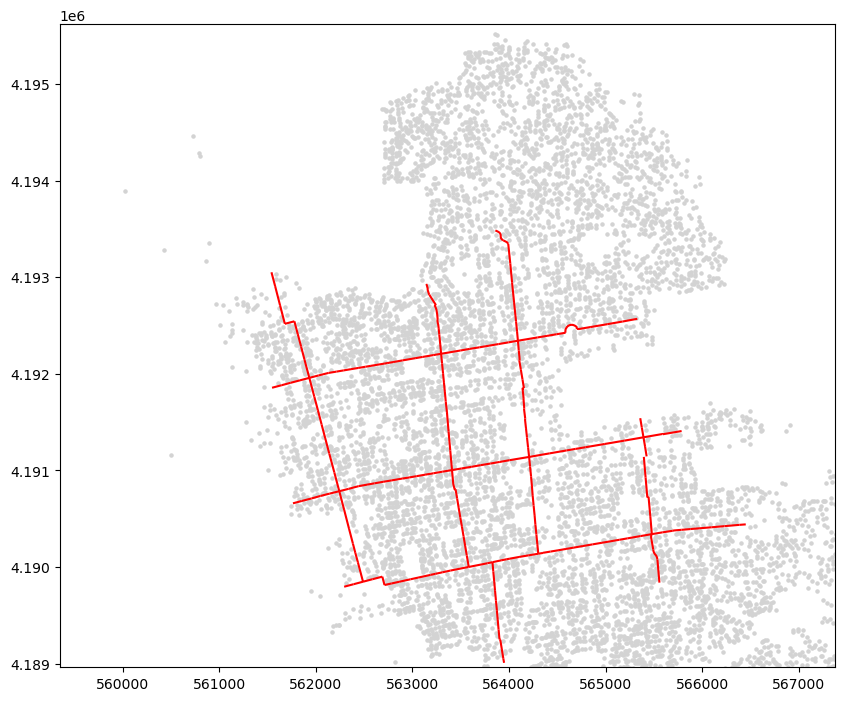

In [67]:
# YOUR CODE HERE
# 3. Create the same plot but limit it to the extent of Berkeley city limits.
# Get bounds
x_min, y_min, x_max, y_max = berkeley_places_utm10.total_bounds
# Make figures
fig, ax = plt.subplots(figsize=(10, 10))
# Plot
bike_blvds_utm10.plot(ax=ax, color='red')
parcel_pts_gdf_utm10.plot(ax=ax, color='lightgrey', markersize=5)
# Set bounds
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

## A Teaser for Day 2...

You may be wondering if and how we could make our maps more interesting and informative than what we've seen so far.

To give you a tantalizing taste of Day 2, the answer is: Yes, we can! And here's how!

In [ ]:
ax = schools_gdf_utm10.plot(column='Org',
                            cmap='winter', 
                            markersize=35,
                            edgecolor='black',
                            linewidth=0.5,
                            alpha=1,
                            figsize=(9, 9),
                            legend=True)
ax.set_title('Public and Private Schools, Alameda County')